In [2]:
import pandas as pd
from scipy.stats import kendalltau
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d
import matplotlib.pyplot as plt

In [3]:
stock_data = pd.read_csv("data/NSE_20_Share_Historical_Data.csv")

currency_data = pd.read_csv("data/cbk_forex_raph.csv")

In [4]:
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,"74,773.85","74,480.29","74,838.76","74,366.97",368.60M,0.36%
1,12/28/2023,"74,502.58","73,768.64","74,502.58","73,734.59",384.58M,0.99%
2,12/27/2023,"73,768.64","74,034.23","74,249.15","73,762.07",432.91M,-0.34%
3,12/22/2023,"74,023.27","74,288.88","74,430.47","74,018.72",423.20M,-0.36%
4,12/21/2023,"74,289.02","73,397.71","74,292.76","73,397.71",760.93M,1.21%


In [4]:
currency_data.head()

,Date,Currency,Mean,Buy,Sell
0,4/1/2024,KES / TSHS,15.9922,15.9207,16.0637
1,4/1/2024,SA RAND,8.3812,8.3591,8.4033
2,4/1/2024,EURO,172.2168,171.7535,172.6800
3,4/1/2024,CAN $,117.8343,117.5238,118.1448
4,4/1/2024,KES / RWF,8.0026,7.9237,8.0814


In [6]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%m/%d/%Y')
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,"74,773.85","74,480.29","74,838.76","74,366.97",368.60M,0.36%
1,2023-12-28,"74,502.58","73,768.64","74,502.58","73,734.59",384.58M,0.99%
2,2023-12-27,"73,768.64","74,034.23","74,249.15","73,762.07",432.91M,-0.34%
3,2023-12-22,"74,023.27","74,288.88","74,430.47","74,018.72",423.20M,-0.36%
4,2023-12-21,"74,289.02","73,397.71","74,292.76","73,397.71",760.93M,1.21%


In [9]:

currency_data['Date'] = pd.to_datetime(currency_data['Date'], format='%d/%m/%Y')
currency_data.head()

,Date,Currency,Mean,Buy,Sell
0,2024-01-04,KES / TSHS,15.9922,15.9207,16.0637
1,2024-01-04,SA RAND,8.3812,8.3591,8.4033
2,2024-01-04,EURO,172.2168,171.7535,172.6800
3,2024-01-04,CAN $,117.8343,117.5238,118.1448
4,2024-01-04,KES / RWF,8.0026,7.9237,8.0814


In [10]:
numeric_columns_stock = ['Price', 'Open', 'High', 'Low']
for col in numeric_columns_stock:
    if stock_data[col].dtype == 'object':
        stock_data[col] = stock_data[col].str.replace(',', '').astype(float)
          
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,74773.85,74480.29,74838.76,74366.97,368.60M,0.36%
1,2023-12-28,74502.58,73768.64,74502.58,73734.59,384.58M,0.99%
2,2023-12-27,73768.64,74034.23,74249.15,73762.07,432.91M,-0.34%
3,2023-12-22,74023.27,74288.88,74430.47,74018.72,423.20M,-0.36%
4,2023-12-21,74289.02,73397.71,74292.76,73397.71,760.93M,1.21%


In [11]:
# Filter datasets to include only overlapping dates
common_dates = pd.merge(stock_data['Date'], currency_data['Date'], on='Date')['Date']
stock_data_filtered = stock_data[stock_data['Date'].isin(common_dates)]
currency_data_filtered = currency_data[currency_data['Date'].isin(common_dates)]

# Print lengths of filtered datasets
print("Length of stock_data_filtered:", len(stock_data_filtered))
print("Length of currency_data_filtered:", len(currency_data_filtered))

# Print unique dates in both datasets
print("Unique dates in stock_data_filtered:", stock_data_filtered['Date'].unique())
print("Unique dates in currency_data_filtered:", currency_data_filtered['Date'].unique())

# Print duplicated dates in both datasets
print("Duplicated dates in stock_data_filtered:")
print(stock_data_filtered[stock_data_filtered.duplicated(subset='Date', keep=False)])
print("Duplicated dates in currency_data_filtered:")
print(currency_data_filtered[currency_data_filtered.duplicated(subset='Date', keep=False)])

currency_data_aggregated = currency_data_filtered.groupby('Date')['Mean'].mean().reset_index()

# Compute Kendall's tau correlation coefficient
kendall_corr, _ = kendalltau(stock_data_filtered['Price'], currency_data_aggregated['Mean'])
print("Kendall's tau correlation coefficient:", kendall_corr)

Length of stock_data_filtered: 1461
Length of currency_data_filtered: 30701
Unique dates in stock_data_filtered: <DatetimeArray>
['2023-12-29 00:00:00', '2023-12-28 00:00:00', '2023-12-27 00:00:00',
 '2023-12-22 00:00:00', '2023-12-21 00:00:00', '2023-12-20 00:00:00',
 '2023-12-19 00:00:00', '2023-12-18 00:00:00', '2023-12-15 00:00:00',
 '2023-12-14 00:00:00',
 ...
 '2018-01-15 00:00:00', '2018-01-12 00:00:00', '2018-01-11 00:00:00',
 '2018-01-10 00:00:00', '2018-01-09 00:00:00', '2018-01-08 00:00:00',
 '2018-01-05 00:00:00', '2018-01-04 00:00:00', '2018-01-03 00:00:00',
 '2018-01-02 00:00:00']
Length: 1461, dtype: datetime64[ns]
Unique dates in currency_data_filtered: <DatetimeArray>
['2023-12-29 00:00:00', '2023-12-28 00:00:00', '2023-12-27 00:00:00',
 '2023-12-22 00:00:00', '2023-12-21 00:00:00', '2023-12-20 00:00:00',
 '2023-12-19 00:00:00', '2023-12-18 00:00:00', '2023-12-15 00:00:00',
 '2023-12-14 00:00:00',
 ...
 '2018-01-15 00:00:00', '2018-01-12 00:00:00', '2018-01-11 00:00:00

In [12]:
# Step 3: Copula Model Selection
# Based on the characteristics of the data, select candidate copula models (e.g., Gaussian copula, t-copula, etc.)
# For simplicity, let's choose Gaussian copula for demonstration
copula = GaussianMultivariate()

In [13]:
# Step 4: Model Fitting and Evaluation
# Fit selected copula model to the data
# For demonstration purposes, we'll fit the copula using only 'Price' and 'Mean' columns
# Clean the data
# Clean the data
stock_data_filtered.dropna(inplace=True)
stock_data_filtered['Change %'] = stock_data_filtered['Change %'].str.replace('%', '')
stock_data_filtered['Change %'] = stock_data_filtered['Change %'].astype(float)

# Fit selected copula model to the cleaned data
copula.fit(stock_data_filtered[['Price', 'Open', 'High', 'Low', 'Change %']])

C:\tools\Manim\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\tools\Manim\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\tools\Manim\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\tools\Manim\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
C:\tools\Manim\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\tools\Manim\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


In [14]:
stock_data_filtered.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,74773.85,74480.29,74838.76,74366.97,368.60M,0.36
1,2023-12-28,74502.58,73768.64,74502.58,73734.59,384.58M,0.99
2,2023-12-27,73768.64,74034.23,74249.15,73762.07,432.91M,-0.34
3,2023-12-22,74023.27,74288.88,74430.47,74018.72,423.20M,-0.36
4,2023-12-21,74289.02,73397.71,74292.76,73397.71,760.93M,1.21


In [24]:
df = pd.DataFrame(stock_data_filtered)

scatter_2d(df[["Date", "Change %"]], title="Percentage Change Over Time - Scatter Chart")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Data=Real<br>Date=%{x}<br>Change %=%{y}<extra></extra>',
              'legendgroup': 'Real',
              'marker': {'color': '#000036', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Real',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2023, 12, 29, 0, 0),
                          datetime.datetime(2023, 12, 28, 0, 0),
                          datetime.datetime(2023, 12, 27, 0, 0), ...,
                          datetime.datetime(2018, 1, 4, 0, 0),
                          datetime.datetime(2018, 1, 3, 0, 0),
                          datetime.datetime(2018, 1, 2, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 0.36,  0.99, -0.34, ...,  1.28, -0.2 ,  0.06]),
              'yaxis': 'y'}],
    'layout': {'font': {'size': 18},
               'legend': {'title': {'text': 'Data'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': '#F5F5F8',
               'showlegend': False,
               'template': '...',
               'title': {'text': 'Percentage Change Over Time - Scatter Chart'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Change %'}}}
})

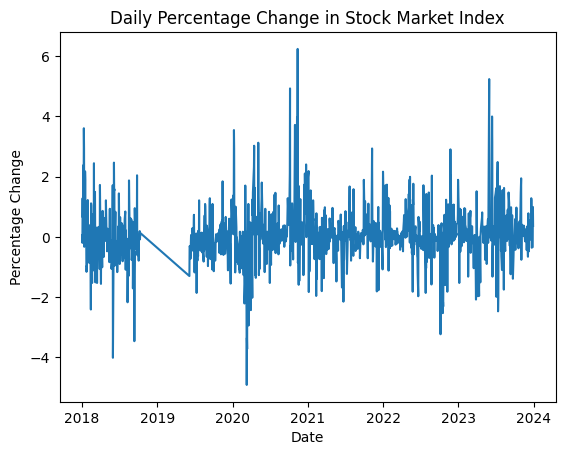

In [22]:
plt.plot(df['Date'], df['Change %'])
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title("Daily Percentage Change in Stock Market Index")
plt.show()


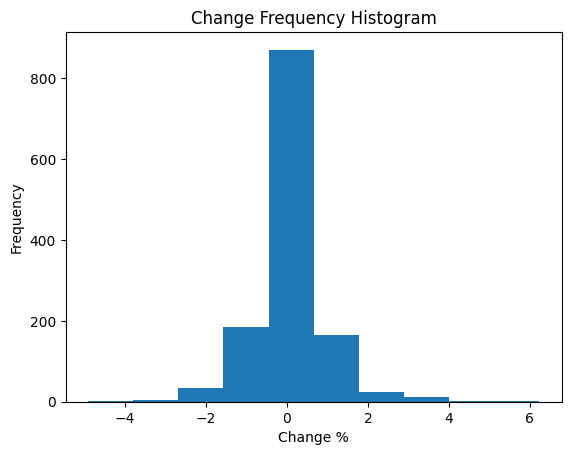

In [23]:
plt.hist(df['Change %'])
plt.xlabel('Change %')
plt.ylabel('Frequency')
plt.title("Change Frequency Histogram")
plt.show()
